In [7]:
library(data.table)

In [8]:
dat= fread('./AvePla.vcf.info')
colnames(dat) = c('CHROM', 'POS', 'QUAL', 'DP', 'MQ', 'AN', 'AC')
str(dat)

Classes ‘data.table’ and 'data.frame':	495577994 obs. of  7 variables:
 $ V1: chr  "Chr1" "Chr1" "Chr1" "Chr1" ...
 $ V2: int  148 149 150 151 152 153 154 155 156 157 ...
 $ V3: chr  "26.0219" "26.0219" "26.0219" "26.0219" ...
 $ V4: int  1 1 1 1 1 1 2 2 2 2 ...
 $ V5: chr  "0" "0" "0" "0" ...
 $ V6: int  2 2 2 2 2 2 4 4 4 4 ...
 $ V7: chr  "." "." "." "." ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [17]:
colnames(dat) = c('CHROM', 'POS', 'QUAL', 'DP', 'MQ', 'AN', 'AC')
dat[, QUAL := as.numeric(QUAL)]
dat[, MQ := as.numeric(MQ)]
# dat[, AC := as.numeric(AC)]
str(dat)

Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(jsub, SDenv, parent.frame()):
“NAs introduced by coercion”


Classes ‘data.table’ and 'data.frame':	495577994 obs. of  7 variables:
 $ CHROM: chr  "Chr1" "Chr1" "Chr1" "Chr1" ...
 $ POS  : int  148 149 150 151 152 153 154 155 156 157 ...
 $ QUAL : num  26 26 26 26 26 ...
 $ DP   : int  1 1 1 1 1 1 2 2 2 2 ...
 $ MQ   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AN   : int  2 2 2 2 2 2 4 4 4 4 ...
 $ AC   : chr  "." "." "." "." ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [19]:
## Mean coverage
cat('Across all samples:\n')
cat('\nAverage per-site coverage', sum(dat$DP)/(nrow(dat)))
cat('\nTotal expected coverage', sum(dat$DP)/nrow(dat))
cat('\nTotal allowed coverage for filtering', sum(dat$DP)/nrow(dat)*2)

Across all samples:

Average per-site coverage 56.46105
Total expected coverage 56.46105
Total allowed coverage for filtering 112.9221

In [22]:
# VCF stats
nrow(dat)

[1] 495577994

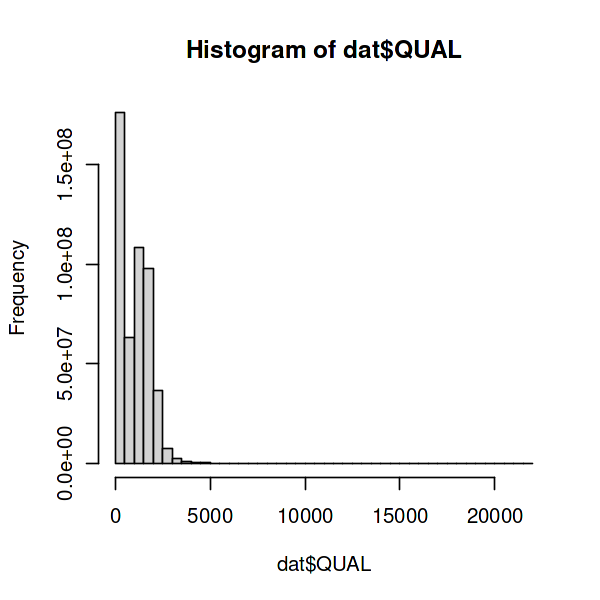

In [20]:
options(repr.plot.width=5, repr.plot.height=5)
cat('No. of sites with ')
sum(dat[QUAL >= 20])/nrow(dat)
hist(dat$QUAL, breaks=50, density=TRUE, xlab='QUAL')

In [23]:
dat1 = fread('./AvePla.biSNPs.vcf.info')
colnames(dat1) =  c('CHROM', 'POS', 'QUAL', 'DP', 'MQ', 'AN', 'AC')
str(dat1)

Classes ‘data.table’ and 'data.frame':	17107390 obs. of  7 variables:
 $ CHROM: chr  "Chr1" "Chr1" "Chr1" "Chr1" ...
 $ POS  : int  1664 1669 1672 3364 3388 3576 3583 3861 3917 3922 ...
 $ QUAL : num  4.63 4.58 4.58 6.3 4.75 ...
 $ DP   : int  9 8 8 110 94 5 7 8 22 21 ...
 $ MQ   : int  7 12 12 2 3 9 7 37 40 41 ...
 $ AN   : int  14 14 14 104 86 10 10 10 26 26 ...
 $ AC   : int  1 1 1 4 5 1 1 1 19 6 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [111]:
1-106/172

[1] 0.3837209

In [51]:
num_samples = 86*2
dat1$F_MISSING = 1-dat1$AN/num_samples

[1] 0.9676354

[1] 0.920065

[1] 0.7972889

[1] 0.6809306

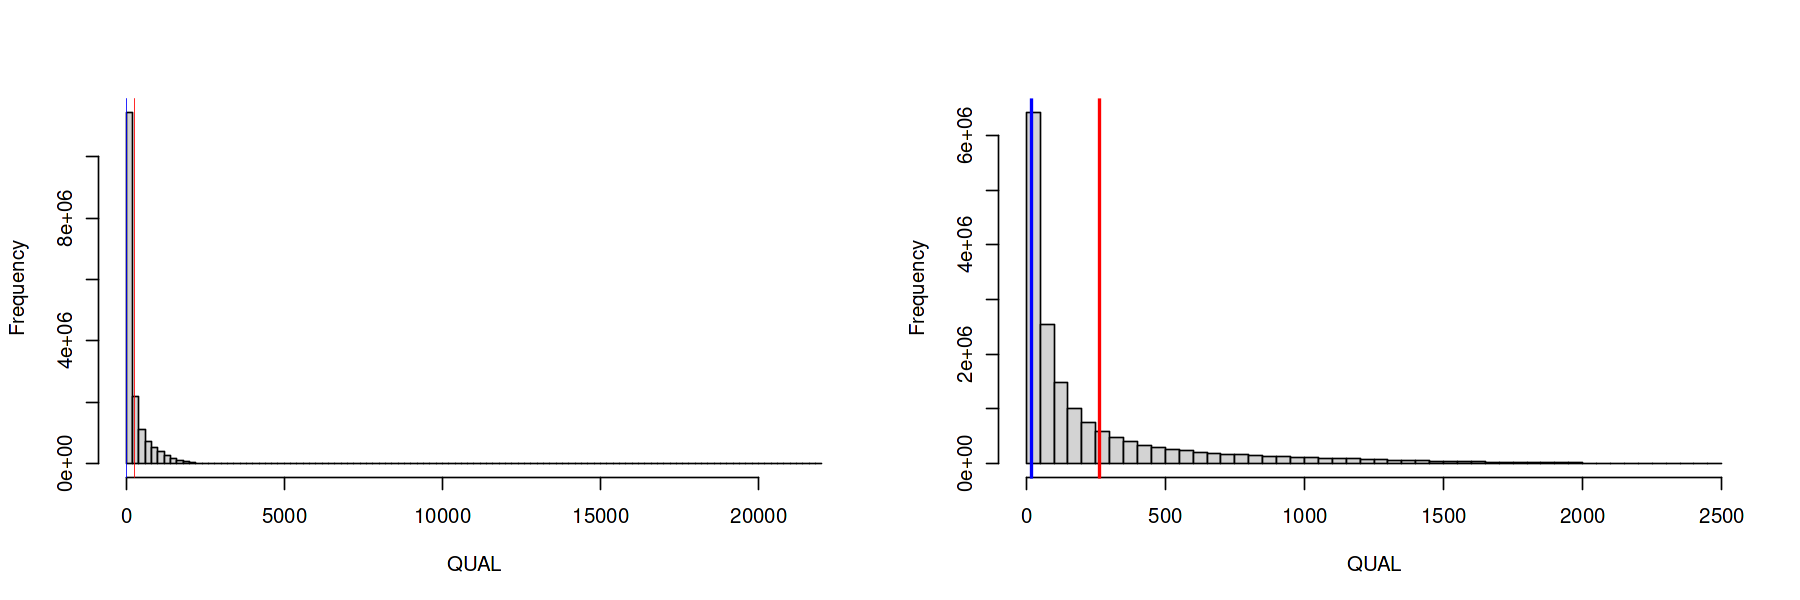

In [82]:
sum(dat1$QUAL>=5)/nrow(dat1)
sum(dat1$QUAL>=10)/nrow(dat1)
sum(dat1$QUAL>=20)/nrow(dat1)
sum(dat1$QUAL>=40)/nrow(dat1)

options(repr.plot.width=15, repr.plot.height=5)
par(mfrow=c(1,2))

hist(dat1$QUAL, breaks=100, main='', xlab='QUAL')
abline(v=mean(dat1$QUAL), lwd=0.5, lty=1, col='red')
abline(v=20, lwd=0.5, lty=1, col='blue')

hist(dat1[QUAL<2500]$QUAL, breaks=50, main='', xlab='QUAL')
abline(v=mean(dat1$QUAL), lwd=2, lty=1, col='red')
abline(v=20, lwd=2, lty=1, col='blue')

[1] 0.9986214

[1] 0.9918957

[1] 0.9547646

[1] 0.8955869

[1] 0.825474

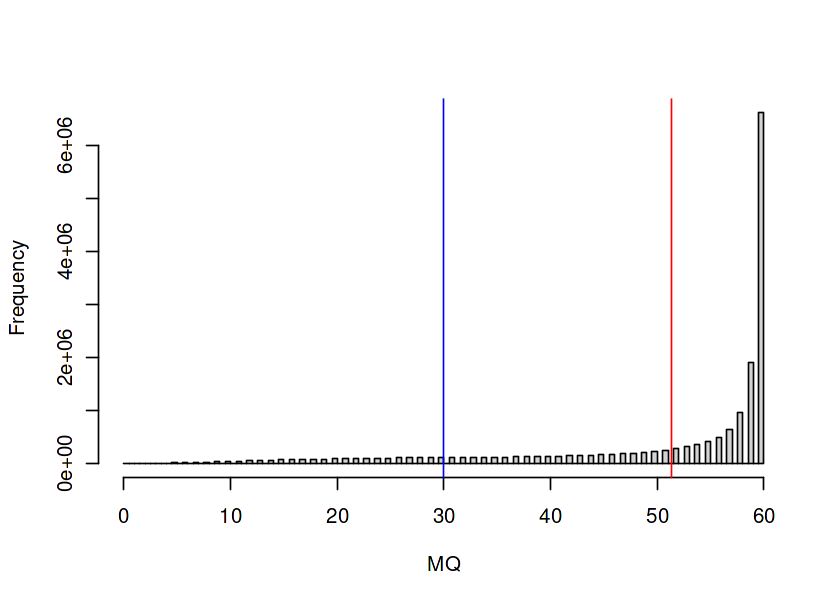

In [94]:
sum(dat1$MQ>=5)/nrow(dat1)
sum(dat1$MQ>=10)/nrow(dat1)
sum(dat1$MQ>=20)/nrow(dat1)
sum(dat1$MQ>=30)/nrow(dat1)
sum(dat1$MQ>=40)/nrow(dat1)

options(repr.plot.width=7)
hist(dat1$MQ, breaks=100, main='', xlab='MQ')
abline(v=mean(dat1$MQ), lwd=1, lty=1, col='red')
abline(v=30, lwd=1, lty=1, col='blue')

[1] 63.04597

[1] 0.9500094

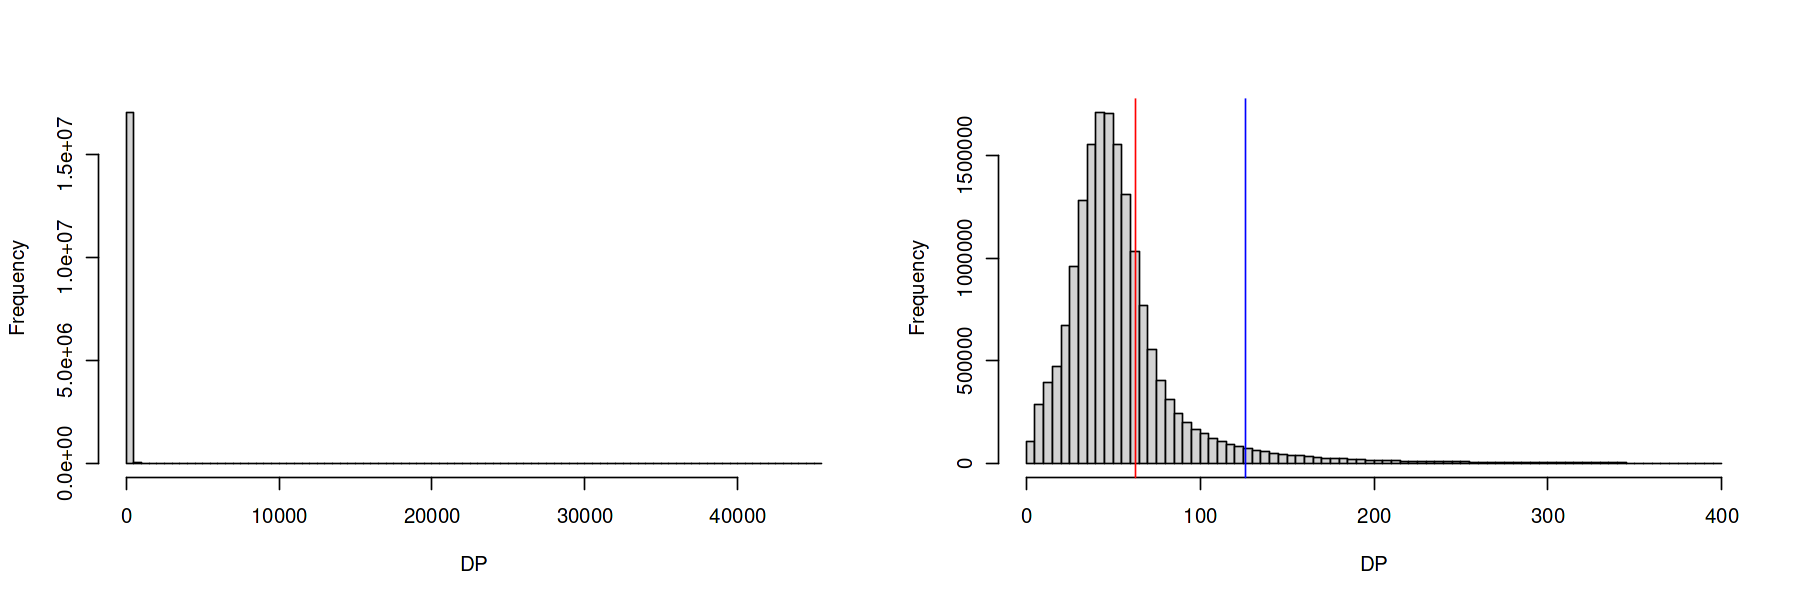

In [92]:
mean(dat1$DP)
sum(dat1$DP<=2*mean(dat1$DP))/nrow(dat1)

options(repr.plot.width=15, repr.plot.height=5)
par(mfrow=c(1,2))
hist(dat1$DP, breaks=100, main='', xlab='DP')
hist(dat1[DP<400]$DP, breaks=80, main='', xlab='DP')
abline(v=mean(dat1$DP), lwd=1, lty=1, col='red')
abline(v=c(2*mean(dat1$DP)), lwd=1, lty=1, col='blue')

[1] 1767962

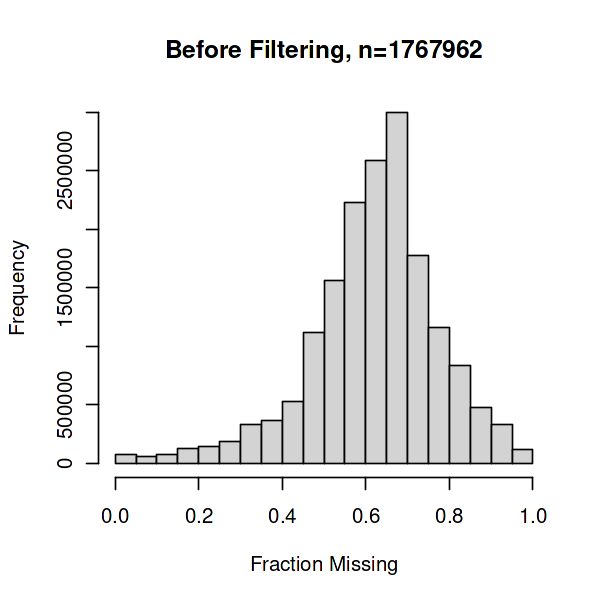

In [108]:
options(repr.plot.width=5, repr.plot.height=5)
sum(dat1$F_MISSING>0.8)
hist(dat1$F_MISSING, breaks=25, xlab='Fraction Missing', main='Before Filtering, n=1767962', xlim=c(0,1))

In [97]:
dat2 = fread('./AvePla.biSNPs.filtered.vcf.info')
colnames(dat2) =  c('CHROM', 'POS', 'QUAL', 'DP', 'MQ', 'AN', 'AC')
str(dat2)

Classes ‘data.table’ and 'data.frame':	12727484 obs. of  7 variables:
 $ CHROM: chr  "Chr1" "Chr1" "Chr1" "Chr1" ...
 $ POS  : int  3917 3922 3992 3994 4048 4071 4082 4323 4350 4357 ...
 $ QUAL : num  121.3 97.5 308 151.1 233.9 ...
 $ DP   : int  22 21 36 34 18 9 4 10 10 9 ...
 $ MQ   : int  40 41 45 45 40 44 38 30 30 30 ...
 $ AN   : int  26 26 34 34 22 16 8 12 12 12 ...
 $ AC   : int  19 6 26 5 18 13 4 9 9 9 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [98]:
dat2$F_MISSING = 1-dat2$AN/num_samples

[1] 1153058

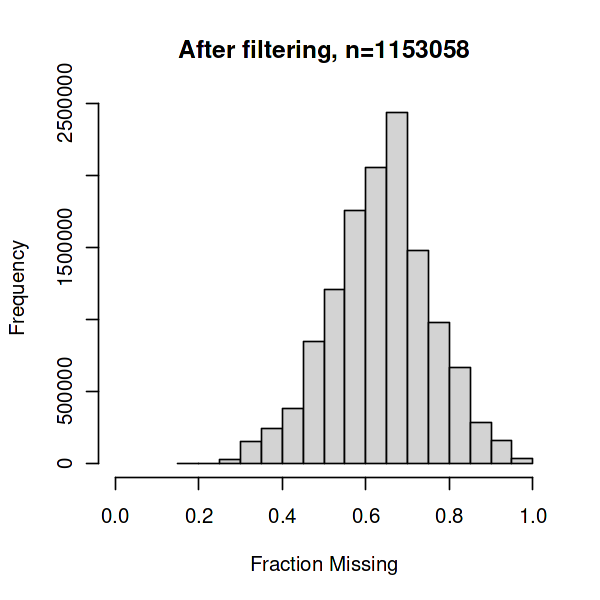

In [109]:
options(repr.plot.width=5, repr.plot.height=5)
sum(dat2$F_MISSING>0.8)
hist(dat2$F_MISSING, breaks=25, xlab='Fraction Missing', main='After filtering, n=1153058', xlim=c(0,1))